## Connect to Drive Account

In [1]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
except:
    print("You are not working in Colab at the moment :(")

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Sentiment Analysis/With New Method'

/content/drive/.shortcut-targets-by-id/1WcN1Xj_6ZlvgCWQvR35DZ3Vc8GoeGpYU/Sentiment Analysis/With New Method


## Import Libraries

In [3]:
import numpy as np
import pandas as pd 
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import wordcloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

import os

## Getting Data

### Twitter Data1

In [ ]:
df1 = pd.read_csv("twitter_data1.csv")
df2 = pd.read_csv("twitter_data2.csv")

tag_set = pd.concat([df1, df2])

In [ ]:
tag_set.duplicated().sum()

3

In [ ]:
tag_set.drop_duplicates(inplace=True)

In [ ]:
len(tag_set)

88926

In [ ]:
tag_set = pd.read_csv("process_data.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
tag_set.head()

,Unnamed: 0,Unnamed: 0.1,Date,UserName,tweets,remove_mentions,remove_links,remove_punctuation,remove_emojis,remove_stopwords,remove_numbers,correct_chars,remove_non_tr,remove_2_ch,remove_tags,lower_ch,strip_spaces,find_lemmas
0,0,0.0,2023-02-02 21:32:37+00:00,sbloztrk_1905,Adam elle oynuyor penaltı olmasın istiyor..Şam...,Adam elle oynuyor penaltı olmasın istiyor..Şam...,Adam elle oynuyor penaltı olmasın istiyor..Şam...,Adam elle oynuyor penaltı olmasın istiyorŞampi...,Adam elle oynuyor penaltı olmasın istiyorŞampi...,Adam elle oynuyor penaltı olmasın istiyorŞampi...,Adam elle oynuyor penaltı olmasın istiyorŞampi...,Adam elle oynuyor penaltı olmasın istiyorŞampi...,Adam elle oynuyor penaltı olmasın istiyorŞampi...,Adam elle oynuyor penaltı olmasın istiyorŞampi...,Adam elle oynuyor penaltı olmasın istiyorŞampi...,adam elle oynuyor penaltı olmasın istiyorşampi...,adam elle oynuyor penaltı olmasın istiyorşampi...,adam el oyna penaltı ol UNK ol kupa UNK yok yı...
1,1,1.0,2023-02-02 21:13:01+00:00,doganoguz23,Formda Galatasaray ve Dünya Kupası öncesi serg...,Formda Galatasaray ve Dünya Kupası öncesi serg...,Formda Galatasaray ve Dünya Kupası öncesi serg...,Formda Galatasaray ve Dünya Kupası öncesi serg...,Formda Galatasaray ve Dünya Kupası öncesi serg...,Formda Galatasaray Dünya Kupası öncesi sergile...,Formda Galatasaray Dünya Kupası öncesi sergile...,Formda Galatasaray Dünya Kupası öncesi sergile...,Formda Galatasaray Dünya Kupası öncesi sergile...,Formda Galatasaray Dünya Kupası öncesi sergile...,Formda Galatasaray Dünya Kupası öncesi sergile...,formda galatasaray dünya kupası öncesi sergile...,formda galatasaray dünya kupası öncesi sergile...,form galatasaray dünya kupası önce sergile for...
2,2,2.0,2023-02-02 21:02:50+00:00,KombineMaca,Galatasaray Trabzon maçına her tribünden bilet...,Galatasaray Trabzon maçına her tribünden bilet...,Galatasaray Trabzon maçına her tribünden bilet...,Galatasaray Trabzon maçına her tribünden bilet...,Galatasaray Trabzon maçına her tribünden bilet...,Galatasaray Trabzon maçına tribünden bilet bul...,Galatasaray Trabzon maçına tribünden bilet bul...,Galatasaray Trabzon maçına tribünden bilet bul...,Galatasaray Trabzon maçına tribünden bilet bul...,Galatasaray Trabzon maçına tribünden bilet bul...,Galatasaray Trabzon maçına tribünden bilet bul...,galatasaray trabzon maçına tribünden bilet bul...,galatasaray trabzon maçına tribünden bilet bul...,galatasaray trabzon maç tribün bilet bulun at ...
3,3,3.0,2023-02-02 20:36:21+00:00,cnnergnc,Fenerbahçe bu akşam futbolundaki durgunluğa du...,Fenerbahçe bu akşam futbolundaki durgunluğa du...,Fenerbahçe bu akşam futbolundaki durgunluğa du...,Fenerbahçe bu akşam futbolundaki durgunluğa du...,Fenerbahçe bu akşam futbolundaki durgunluğa du...,Fenerbahçe akşam futbolundaki durgunluğa dur d...,Fenerbahçe akşam futbolundaki durgunluğa dur d...,Fenerbahçe akşam futbolundaki durgunluğa dur d...,Fenerbahçe akşam futbolundaki durgunluğa dur d...,Fenerbahçe akşam futbolundaki durgunluğa dur d...,Fenerbahçe akşam futbolundaki durgunluğa dur d...,fenerbahçe akşam futbolundaki durgunluğa dur d...,fenerbahçe akşam futbolundaki durgunluğa dur d...,fenerbahçe akşam futbol durgun dur de takım ça...
4,4,4.0,2023-02-02 19:49:38+00:00,1907_hn,"#Fenerbahce sen kendi evinde cincona kaybet, d...","#Fenerbahce sen kendi evinde cincona kaybet, d...","#Fenerbahce sen kendi evinde cincona kaybet, d...",Fenerbahce sen kendi evinde cincona kaybet dah...,Fenerbahce sen kendi evinde cincona kaybet dah...,Fenerbahce sen kendi evinde cincona kaybet der...,Fenerbahce sen kendi evinde cincona kaybet der...,Fenerbahce sen kendi evinde cincona kaybet der...,Fenerbahce sen kendi evinde cincona kaybet der...,Fenerbahce sen kendi evinde cincona kaybet der...,Fenerbahce sen kendi evinde cincona kaybet der...,fenerbahce sen kendi evinde cincona kaybet der...,fenerbahce sen kendi evinde cincona kaybet der...,UNK sen kendi ev UNK kaybet derbi kazan ıvır z...


## Twitter Data 2

In [ ]:
tag_set = pd.read_csv("data_sports_comma.csv")

In [ ]:
tag_set.duplicated().sum()

0

In [ ]:
len(tag_set)

44292

### Trained Data

In [ ]:
%cd '/content/drive/MyDrive/Sentiment Analysis/Data'

/content/drive/MyDrive/Sentiment Analysis/Data


In [ ]:
df3 = pd.read_csv("train.csv")
df4 = pd.read_csv("test.csv")

In [ ]:
sentiSet = pd.concat([df3, df4])

In [ ]:
sentiSet.drop_duplicates(inplace=True)

In [ ]:
sentiset = pd.read_csv("datawithoutstopwordswithlemmas.csv")

In [ ]:
sentiset.head()

,Unnamed: 0,find_lemmas
0,0,ürün hepsiburada al hafta ol orjinal eksik şek...
1,1,ürün memnun kesinlikle herkes tavsiye et ayrıc...
2,2,hız kargo temiz UNK et
3,3,çünkü ara tapınak bölge
4,4,telefon başlıca al neden el samsung artık yete...


## Data Preprocessing

In [ ]:
!pip install jpype1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 9.8 MB/s eta 0:00:00


In [ ]:
import string
import gensim.parsing.preprocessing as gsp
import re
from typing import List
from jpype import JClass, JString, getDefaultJVMPath, shutdownJVM, startJVM, java
ZEMBEREK_PATH = '/content/drive/MyDrive/Sentiment Analysis/zemberek-full.jar'

In [ ]:
def remove_punctuation(data):
    
    data_no_punctuation = [ch for ch in str(data) if ch not in string.punctuation]
    data_no_punctuation = "".join(data_no_punctuation)

    return data_no_punctuation

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"  
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, ' ', str(data))

import nltk
nltk.download('punkt')

def remove_stopwords(text): 
    stop_words = ['çok', 'at', 'in', 'im', 'acaba','acep','allah','adamakıllı','adeta','ait','altmýþ','altmış','altý'
                  , 'altı','ama','amma','anca','ancak','arada','artýk','aslında','aynen','ayrıca','az','açıkça','açıkçası',
                  'bana','bari','bazen','bazý','bazı','başkası','baţka','belki','ben','benden','beni','benim',
                  'beri','beriki','beþ','beş','beţ','bilcümle','bile','bin','binaen','binaenaleyh','bir','biraz',
                  'birazdan','birbiri','birden','birdenbire','biri','birice','birileri','birisi','birkaç',
                  'birkaçı','birkez','birlikte','birçok','birçoğu','birþey','birþeyi','birşey','birşeyi','birţey',
                  'bitevi','biteviye','bittabi','biz','bizatihi','bizce','bizcileyin','bizden','bize','bizi','bizim',
                  'bizimki','bizzat','boşuna','bu','buna','bunda','bundan','bunlar','bunları','bunların','bunu','bunun',
                  'buracıkta','burada','buradan','burası','böyle','böylece','böylecene','böylelikle','böylemesine',
                  'böylesine','büsbütün','bütün','cuk','cümlesi','da','daha','dahi','dahil','dahilen','daima','dair',
                  'dayanarak','de','defa','dek','demin','demincek','deminden','denli','derakap','derhal','derken',
                  'deđil','değil','değin','diye','diđer','diğer','diğeri','doksan','dokuz','dolayı','dolayısıyla',
                  'doğru','dört','edecek','eden','ederek','edilecek','ediliyor','edilmesi','ediyor','elbet',
                  'elbette','elli','emme','en','enikonu','epey','epeyce','epeyi','esasen','esnasında','etmesi',
                  'etraflı','etraflıca','etti','ettiği','ettiğini','evleviyetle','evvel','evvela','evvelce',
                  'evvelden','evvelemirde','evveli','eđer','eğer','fakat','filanca','gah','gayet','gayetle','gayri',
                  'gayrı','gelgelelim','gene','gerek','gerçi','geçende','geçenlerde','gibi','gibilerden','gibisinden',
                  'gine','göre','gırla','hakeza','halbuki','halen','halihazırda','haliyle','handiyse','hangi','hangisi',
                  'hani','hariç','hasebiyle','hasılı','hatta','hele','hem','henüz','hep','hepsi','her',
                  'herhangi','herkes','herkesin','hiç','hiçbir','hiçbiri','hoş','hulasaten','iken','iki',
                  'ila','ile','ilen','ilgili','ilk','illa','illaki','imdi','indinde','inen','insermi','ise',
                  'ister','itibaren','itibariyle','itibarıyla','iyi','iyice','iyicene','için','iş','işte',
                  'iţte','kadar','kaffesi','kah','kala','kanýmca','karşın','katrilyon','kaynak','kaçı','kelli',
                  'kendi','kendilerine','kendini','kendisi','kendisine','kendisini','kere','kez','keza','kezalik',
                  'keşke','keţke','ki','kim','kimden','kime','kimi','kimisi','kimse','kimsecik','kimsecikler',
                  'külliyen','kýrk','kýsaca','kırk','kısaca','lakin','leh','lütfen','maada','madem','mademki',
                  'mamafih','mebni','međer','meğer','meğerki','meğerse','milyar','milyon','mu','mü','mý','mı',
                  'nasýl','nasıl','nasılsa','nazaran','naşi','ne','neden','nedeniyle','nedenle','nedense',
                  'nerde','nerden','nerdeyse','nere','nerede','nereden','neredeyse','neresi','nereye',
                  'netekim','neye','neyi','neyse','nice','nihayet','nihayetinde','nitekim','niye','niçin',
                  'o','olan','olarak','oldu','olduklarını','oldukça','olduğu','olduğunu','olmadı',
                  'olmadığı','olmak','olması','olmayan','olmaz','olsa','olsun','olup','olur','olursa','oluyor',
                  'on','ona','onca','onculayın','onda','ondan','onlar','onlardan','onlari','onlarýn','onları',
                  'onların','onu','onun','oracık','oracıkta','orada','oradan','oranca','oranla','oraya','otuz',
                  'oysa','oysaki','pek','pekala','peki','pekçe','peyderpey','rağmen','sadece','sahi','sahiden',
                  'sana','sanki','sekiz','seksen','sen','senden','seni','senin','siz','sizden','sizi','sizin',
                  'sonra','sonradan','sonraları','sonunda','tabii','tam','tamam','tamamen','tamamıyla','tarafından',
                  'tek','trilyon','tüm','var','vardı','vasıtasıyla','ve','velev','velhasıl','velhasılıkelam','veya',
                  'veyahut','ya','yahut','yakinen','yakında','yakından','yakınlarda','yalnız','yalnızca','yani',
                  'yapacak','yapmak','yaptı','yaptıkları','yaptığı','yaptığını','yapılan','yapılması','yapıyor',
                  'yedi','yeniden','yenilerde','yerine','yetmiþ','yetmiş','yetmiţ','yine','yirmi','yok','yoksa',
                  'yoluyla','yüz','yüzünden','zarfında','zaten','zati','zira','çabuk','çabukça','çeşitli',
                  'çok','çokları','çoklarınca','çokluk','çoklukla','çokça','çoğu','çoğun','çoğunca','çoğunlukla',
                  'çünkü','öbür','öbürkü','öbürü','önce','önceden','önceleri','öncelikle','öteki','ötekisi','öyle',
                  'öylece','öylelikle','öylemesine','öz','üzere','üç','þey','þeyden','þeyi','þeyler','þu','þuna',
                  'þunda','þundan','þunu','şayet','şey','şeyden','şeyi','şeyler','şu','şuna','şuncacık','şunda',
                  'şundan','şunlar','şunları','şunu','şunun','şura','şuracık','şuracıkta','şurası','şöyle',
                  'ţayet','ţimdi','ţu','ţöyle', 'hala', 'yer', 'güzel', 'büyük']
    stop_words = ['a','acaba','altı','altmış','ama','ancak','arada','artık','asla','aslında','aslında','ayrıca',
                  'az','bana','bazen','bazı','bazıları','belki','ben','benden','beni','benim','beri','beş',
                  'bile','bilhassa','bin','bir','biraz','birçoğu','birçok','biri','birisi','birkaç','birşey',
                  'biz','bizden','bize','bizi','bizim','böyle','böylece','bu','buna','bunda','bundan','bunlar',
                  'bunları','bunların','bunu','bunun','burada','bütün','çoğu','çoğunu','çok','çünkü','da',
                  'daha','dahi','dan','de','defa','değil','diğer','diğeri','diğerleri','diye','doksan','dokuz',
                  'dolayı','dolayısıyla','dört','e','edecek','eden','ederek','edilecek','ediliyor','edilmesi',
                  'ediyor','eğer','elbette','elli','en','etmesi','etti','ettiği','ettiğini','fakat','falan',
                  'filan','gene','gereği','gerek','gibi','göre','hala','halde','halen','hangi','hangisi',
                  'hani','hatta','hem','henüz','hep','hepsi','her','herhangi','herkes','herkese','herkesi',
                  'herkesin','hiç','hiçbir','hiçbiri','i','ı','için','içinde','iki','ile','ilgili','ise',
                  'işte','itibaren','itibariyle','kaç','kadar','karşın','kendi','kendilerine','kendine',
                  'kendini','kendisi','kendisine','kendisini','kez','ki','kim','kime','kimi','kimin',
                  'kimisi','kimse','kırk','madem','mi','mı','milyar','milyon','mu','mü','nasıl','ne',
                  'neden','nedenle','nerde','nerede','nereye','neyse','niçin','nin','nın','niye','nun',
                  'nün','o','öbür','olan','olarak','oldu','olduğu','olduğunu','olduklarını','olmadı',
                  'olmadığı','olmak','olması','olmayan','olmaz','olsa','olsun','olup','olur','olur','olursa',
                  'oluyor','on','ön','ona','önce','ondan','onlar','onlara','onlardan','onları','onların',
                  'onu','onun','orada','öte','ötürü','otuz','öyle','oysa','pek','rağmen','sana','sanki',
                  'sanki','şayet','şekilde','sekiz','seksen','sen','senden','seni','senin','şey','şeyden',
                  'şeye','şeyi','şeyler','şimdi','siz','siz','sizden','sizden','size','sizi','sizi',
                  'sizin','sizin','sonra','şöyle','şu','şuna','şunları','şunu','ta','tabii','tam',
                  'tamam','tamamen','tarafından','trilyon','tüm','tümü','u','ü','üç','un','ün','üzere',
                  'var','vardı','ve','veya','ya','yani','yapacak','yapılan','yapılması','yapıyor','yapmak',
                  'yaptı','yaptığı','yaptığını','yaptıkları','ye','yedi','yerine','yetmiş','yi','yı','yine',
                  'yirmi','yoksa','yu','yüz','zaten','zira','zxtest']
    
    stop_words = ['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'bir', 'birkaç', 'birşey', 'biz',
                  'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'den', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem',
                  'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü',
                  'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey',
                  'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani', 'dan']
    word_tokens = nltk.word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return ' '.join(filtered_text)

def correct_old_characters(self):
    self = re.sub(r"Â", "A", self)
    self = re.sub(r"Î", "I", self)
    self = re.sub(r"î", "ı", self)
    self = re.sub(r"â", "a", self)
    self = re.sub(r"û", "u", self)
    self = re.sub(r"Û", "U", self)
    return self

def remove_two_ch_words(data):
  text = ' '.join([w for w in data.split() if len(w)>2])
  return text

regex_for_remove_tags = r'<.*?>'

def remove_tags(data):
  text = re.sub(pattern=regex_for_remove_tags, repl=' ', string=data)
  return text

def lower(self):
    self = re.sub(r"İ", "i", self)
    self = re.sub(r"I", "ı", self)
    self = re.sub(r"Ç", "ç", self)
    self = re.sub(r"Ş", "ş", self)
    self = re.sub(r"Ü", "ü", self)
    self = re.sub(r"Ğ", "ğ", self)
    self = self.lower() # for the rest use default lower
    return self

startJVM(jvmpath=getDefaultJVMPath(), classpath= ZEMBEREK_PATH, convertStrings=False, interrupt=True)
def tokenizasyon(text):
    return word_tokenize(text)
counter = 0
def lemmatizer(text):
    lemma_words = []
    global counter
    """if jpype.isJVMStarted() is False:
      ZEMBEREK_PATH = '/content/drive/MyDrive/Sentiment Analysis/zemberek-full.jar'
      startJVM(jvmpath=getDefaultJVMPath(), classpath= ZEMBEREK_PATH, convertStrings=False, interrupt=True)"""
    TurkishMorphology = JClass('zemberek.morphology.TurkishMorphology')
    morphology = TurkishMorphology.createWithDefaults()
    for text in tokenizasyon(text):
      lemma_word = str(morphology.analyzeAndDisambiguate(str(text)).bestAnalysis()[0].getLemmas()[0])
      lemma_words.append(lemma_word)
    
    text = ' '.join(lemma_words)
    counter += 1
    print(counter)
    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from datetime import datetime

In [ ]:
start = datetime.now()
regex_mentions_or_emails = r'([A-Za-z]+[_ ]+[A-Za-z]*[0-9]*@\w+.[com]*)'
tag_set['remove_mentions'] = tag_set['tweets'].str.replace(regex_mentions_or_emails, ' ', case=False, regex=True)
regex_links = r'http\S+|www.\S+'
tag_set['remove_links'] = tag_set['remove_mentions'].str.replace(regex_links, ' ', case=False, regex=True)
tag_set['remove_punctuation'] = tag_set['remove_links'].apply(remove_punctuation)
tag_set['remove_emojis'] = tag_set['remove_punctuation'].apply(remove_emojis)
tag_set['remove_stopwords'] = tag_set['remove_emojis'].apply(remove_stopwords)
regex_for_numbers = r'([0-9]+)'
tag_set['remove_numbers'] = tag_set['remove_stopwords'].str.replace(regex_for_numbers, ' ', case=False, regex=True)
tag_set['correct_chars'] = tag_set['remove_numbers'].apply(lambda x: correct_old_characters(x))
whitelist = set('abcçdefgğhıijklmnoöpqrsştuüvwxyz ABCÇDEFGĞHIİJKLMNOÖPQRSŞTUÜVWXYZ')
tag_set['remove_non_tr'] = tag_set['correct_chars'].apply(lambda x: ''.join(filter(whitelist.__contains__, x)))
tag_set['remove_2_ch'] = tag_set['remove_non_tr'].apply(remove_two_ch_words)
tag_set['remove_tags'] = tag_set['remove_2_ch'].apply(remove_tags)
tag_set['lower_ch'] = tag_set['remove_tags'].apply(lambda x: lower(x))
tag_set['strip_spaces'] = tag_set['lower_ch'].apply(gsp.strip_multiple_whitespaces)
tag_set['lower_ch'] = tag_set['lower_ch'].fillna("")
tag_set['find_lemmas'] = tag_set['lower_ch'].apply(lemmatizer)
end = datetime.now()
tag_set.to_csv("process_data_sports_2.csv")
print(str(end - start))

Görüntülenen çıkış son 5000 satıra kısaltıldı.
39294
39295
39296
39297
39298
39299
39300
39301
39302
39303
39304
39305
39306
39307
39308
39309
39310
39311
39312
39313
39314
39315
39316
39317
39318
39319
39320
39321
39322
39323
39324
39325
39326
39327
39328
39329
39330
39331
39332
39333
39334
39335
39336
39337
39338
39339
39340
39341
39342
39343
39344
39345
39346
39347
39348
39349
39350
39351
39352
39353
39354
39355
39356
39357
39358
39359
39360
39361
39362
39363
39364
39365
39366
39367
39368
39369
39370
39371
39372
39373
39374
39375
39376
39377
39378
39379
39380
39381
39382
39383
39384
39385
39386
39387
39388
39389
39390
39391
39392
39393
39394
39395
39396
39397
39398
39399
39400
39401
39402
39403
39404
39405
39406
39407
39408
39409
39410
39411
39412
39413
39414
39415
39416
39417
39418
39419
39420
39421
39422
39423
39424
39425
39426
39427
39428
39429
39430
39431
39432
39433
39434
39435
39436
39437
39438
39439
39440
39441
39442
39443
39444
39445
39446
39447
39448
39449
39450
39451
39452

In [ ]:
tag_set["find_lemmas"].to_csv("process_data_sports_.csv")

In [ ]:
tag_set.head()

,Unnamed: 0,Date,UserName,tweets,remove_mentions,remove_links,remove_punctuation,remove_emojis,remove_stopwords,remove_numbers,correct_chars,remove_non_tr,remove_2_ch,remove_tags,lower_ch,strip_spaces,find_lemmas
0,0,2023-03-10,neyseyaoylesine,Çocukluk aşkımın maçı var bugün 💛❤️ #Galatasar...,Çocukluk aşkımın maçı var bugün 💛❤️ #Galatasar...,Çocukluk aşkımın maçı var bugün 💛❤️ #Galatasar...,Çocukluk aşkımın maçı var bugün 💛❤️ Galatasara...,Çocukluk aşkımın maçı var bugün Galatasaray ...,Çocukluk aşkımın maçı var bugün Galatasaray ço...,Çocukluk aşkımın maçı var bugün Galatasaray ço...,Çocukluk aşkımın maçı var bugün Galatasaray ço...,Çocukluk aşkımın maçı var bugün Galatasaray ço...,Çocukluk aşkımın maçı var bugün Galatasaray ço...,Çocukluk aşkımın maçı var bugün Galatasaray ço...,çocukluk aşkımın maçı var bugün galatasaray ço...,çocukluk aşkımın maçı var bugün galatasaray ço...,çocukluk aşk maç var bugün galatasaray UNK UNK...
1,1,2023-03-10,superhaberspor,🔥#Arsenal'ın hedefinde #Galatasaray'ın genç yı...,🔥#Arsenal'ın hedefinde #Galatasaray'ın genç yı...,🔥#Arsenal'ın hedefinde #Galatasaray'ın genç yı...,🔥Arsenalın hedefinde Galatasarayın genç yıldız...,Arsenalın hedefinde Galatasarayın genç yıldız...,Arsenalın hedefinde Galatasarayın genç yıldızı...,Arsenalın hedefinde Galatasarayın genç yıldızı...,Arsenalın hedefinde Galatasarayın genç yıldızı...,Arsenalın hedefinde Galatasarayın genç yıldızı...,Arsenalın hedefinde Galatasarayın genç yıldızı...,Arsenalın hedefinde Galatasarayın genç yıldızı...,arsenalın hedefinde galatasarayın genç yıldızı...,arsenalın hedefinde galatasarayın genç yıldızı...,UNK hedef galatasaray genç yıldız var
2,2,2023-03-10,superhaberspor,👏#Galatasaray'ın müzayedesinde depremzedeler i...,👏#Galatasaray'ın müzayedesinde depremzedeler i...,👏#Galatasaray'ın müzayedesinde depremzedeler i...,👏Galatasarayın müzayedesinde depremzedeler içi...,Galatasarayın müzayedesinde depremzedeler içi...,Galatasarayın müzayedesinde depremzedeler 17 m...,Galatasarayın müzayedesinde depremzedeler mi...,Galatasarayın müzayedesinde depremzedeler mi...,Galatasarayın müzayedesinde depremzedeler mi...,Galatasarayın müzayedesinde depremzedeler mily...,Galatasarayın müzayedesinde depremzedeler mily...,galatasarayın müzayedesinde depremzedeler mily...,galatasarayın müzayedesinde depremzedeler mily...,galatasaray müzayede depremzede milyon gelir UNK
3,3,2023-03-10,gundemgaztesi,#Galatasaray Kulübü #depremzedeler yararına mü...,#Galatasaray Kulübü #depremzedeler yararına mü...,#Galatasaray Kulübü #depremzedeler yararına mü...,Galatasaray Kulübü depremzedeler yararına müza...,Galatasaray Kulübü depremzedeler yararına müza...,Galatasaray Kulübü depremzedeler yararına müza...,Galatasaray Kulübü depremzedeler yararına müza...,Galatasaray Kulübü depremzedeler yararına müza...,Galatasaray Kulübü depremzedeler yararına müza...,Galatasaray Kulübü depremzedeler yararına müza...,Galatasaray Kulübü depremzedeler yararına müza...,galatasaray kulübü depremzedeler yararına müza...,galatasaray kulübü depremzedeler yararına müza...,galatasaray kulüp depremzede yarar müzayede dü...
4,4,2023-03-10,YcelBaysal9,ALOo Beyler Bayanlar \n#BugünGünlerdenGALATASA...,ALOo Beyler Bayanlar \n#BugünGünlerdenGALATASA...,ALOo Beyler Bayanlar \n#BugünGünlerdenGALATASA...,ALOo Beyler Bayanlar \nBugünGünlerdenGALATASAR...,ALOo Beyler Bayanlar \nBugünGünlerdenGALATASAR...,ALOo Beyler Bayanlar BugünGünlerdenGALATASARAY...,ALOo Beyler Bayanlar BugünGünlerdenGALATASARAY...,ALOo Beyler Bayanlar BugünGünlerdenGALATASARAY...,ALOo Beyler Bayanlar BugünGünlerdenGALATASARAY...,ALOo Beyler Bayanlar BugünGünlerdenGALATASARAY...,ALOo Beyler Bayanlar BugünGünlerdenGALATASARAY...,aloo beyler bayanlar bugüngünlerdengalatasaray...,aloo beyler bayanlar bugüngünlerdengalatasaray...,UNK bey bayan UNK konsantrasyon hedef UNK gala...


## Find most common words

In [ ]:
from collections import Counter
import seaborn as sns

In [ ]:
def tokenizasyon(text):
    return word_tokenize(text)

In [ ]:
kelimeler = []
tokens = tag_set["find_lemmas"].apply(tokenizasyon)
tokens = tokens.values.tolist()
for token in tokens:
    for tok in token:
        kelimeler.append(tok)

<AxesSubplot:>

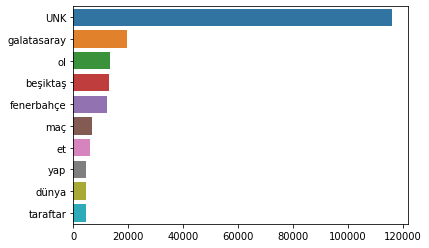

In [ ]:
counter = Counter(kelimeler)
most = counter.most_common()

x, y = [], []
for word,count in most[:10]:
    x.append(word)
    y.append(count)
        
sns.barplot(x=y,y=x)

In [ ]:
sentiset["find_lemmas"][0]

'ürün hepsiburada al hafta ol orjinal eksik şekil gel şarj konu gün rahat çıkar oyun oyna rağmen teslimat süre hız gerçek uygun fiyat UNK kalite kaçır'

In [ ]:
sentiset["find_lemmas"].fillna(" ", inplace=True)

In [ ]:
kelimeler = []
tokens = sentiset["find_lemmas"].apply(tokenizasyon)
tokens = tokens.values.tolist()
for token in tokens:
    for tok in token:
        kelimeler.append(tok)

<AxesSubplot:>

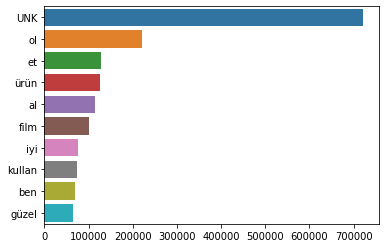

In [ ]:
counter = Counter(kelimeler)
most = counter.most_common()

x, y = [], []
for word,count in most[:10]:
    x.append(word)
    y.append(count)
        
sns.barplot(x=y,y=x)

In [ ]:
sentiSet.head()

,text,label,dataset
0,ürünü hepsiburadadan alalı 3 hafta oldu. orjin...,Positive,urun_yorumlari
1,"ürünlerden çok memnunum, kesinlikle herkese ta...",Positive,urun_yorumlari
2,"hızlı kargo, temiz alışveriş.teşekkür ederim.",Positive,urun_yorumlari
3,Çünkü aranan tapınak bu bölgededir .,Notr,wiki
4,bu telefonu başlıca alma nedenlerim ise elimde...,Positive,urun_yorumlari


In [ ]:
sentiset.reset_index(drop=True, inplace=True)
sentiSet.reset_index(drop=True, inplace=True)

In [ ]:
df = pd.concat([sentiset, sentiSet], axis=1)

In [ ]:
print(sentiset.shape)
print(sentiSet.shape)


(489112, 2)
(489112, 3)


In [ ]:
df.head()

,Unnamed: 0,find_lemmas,text,label,dataset
0,0,ürün hepsiburada al hafta ol orjinal eksik şek...,ürünü hepsiburadadan alalı 3 hafta oldu. orjin...,Positive,urun_yorumlari
1,1,ürün memnun kesinlikle herkes tavsiye et ayrıc...,"ürünlerden çok memnunum, kesinlikle herkese ta...",Positive,urun_yorumlari
2,2,hız kargo temiz UNK et,"hızlı kargo, temiz alışveriş.teşekkür ederim.",Positive,urun_yorumlari
3,3,çünkü ara tapınak bölge,Çünkü aranan tapınak bu bölgededir .,Notr,wiki
4,4,telefon başlıca al neden el samsung artık yete...,bu telefonu başlıca alma nedenlerim ise elimde...,Positive,urun_yorumlari


In [ ]:
df.fillna(" ", inplace=True)

In [ ]:
d_pos = df[df.label =='Positive']
d_neg = df[df.label=='Negative']
d_notr = df[df.label=='Notr']

<AxesSubplot:>

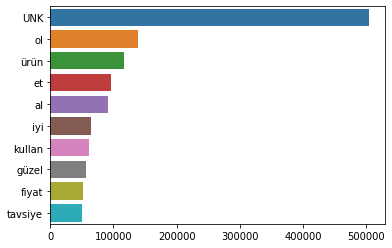

In [ ]:
kelimeler = []
tokens = d_pos["find_lemmas"].apply(tokenizasyon)
tokens = tokens.values.tolist()
for token in tokens:
    for tok in token:
        kelimeler.append(tok)

counter = Counter(kelimeler)
most = counter.most_common()

x, y = [], []
for word,count in most[:10]:
    x.append(word)
    y.append(count)
        
sns.barplot(x=y,y=x)

<AxesSubplot:>

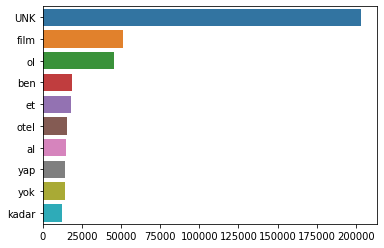

In [ ]:
kelimeler = []
tokens = d_neg["find_lemmas"].apply(tokenizasyon)
tokens = tokens.values.tolist()
for token in tokens:
    for tok in token:
        kelimeler.append(tok)

counter = Counter(kelimeler)
most = counter.most_common()

x, y = [], []
for word,count in most[:10]:
    x.append(word)
    y.append(count)
        
sns.barplot(x=y,y=x)

<AxesSubplot:>

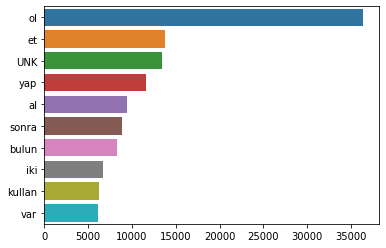

In [ ]:
kelimeler = []
tokens = d_notr["find_lemmas"].apply(tokenizasyon)
tokens = tokens.values.tolist()
for token in tokens:
    for tok in token:
        kelimeler.append(tok)

counter = Counter(kelimeler)
most = counter.most_common()

x, y = [], []
for word,count in most[:10]:
    x.append(word)
    y.append(count)
        
sns.barplot(x=y,y=x)

#Transform Vectors

In [ ]:
sentiset.head()

,Unnamed: 0,find_lemmas
0,0,ürün hepsiburada al hafta ol orjinal eksik şek...
1,1,ürün memnun kesinlikle herkes tavsiye et ayrıc...
2,2,hız kargo temiz UNK et
3,3,çünkü ara tapınak bölge
4,4,telefon başlıca al neden el samsung artık yete...


In [ ]:
tag_set.head()

,Unnamed: 0,Unnamed: 0.1,Date,UserName,tweets,remove_mentions,remove_links,remove_punctuation,remove_emojis,remove_stopwords,remove_numbers,correct_chars,remove_non_tr,remove_2_ch,remove_tags,lower_ch,strip_spaces,find_lemmas
0,0,0.0,2023-02-02 21:32:37+00:00,sbloztrk_1905,Adam elle oynuyor penaltı olmasın istiyor..Şam...,Adam elle oynuyor penaltı olmasın istiyor..Şam...,Adam elle oynuyor penaltı olmasın istiyor..Şam...,Adam elle oynuyor penaltı olmasın istiyorŞampi...,Adam elle oynuyor penaltı olmasın istiyorŞampi...,Adam elle oynuyor penaltı olmasın istiyorŞampi...,Adam elle oynuyor penaltı olmasın istiyorŞampi...,Adam elle oynuyor penaltı olmasın istiyorŞampi...,Adam elle oynuyor penaltı olmasın istiyorŞampi...,Adam elle oynuyor penaltı olmasın istiyorŞampi...,Adam elle oynuyor penaltı olmasın istiyorŞampi...,adam elle oynuyor penaltı olmasın istiyorşampi...,adam elle oynuyor penaltı olmasın istiyorşampi...,adam el oyna penaltı ol UNK ol kupa UNK yok yı...
1,1,1.0,2023-02-02 21:13:01+00:00,doganoguz23,Formda Galatasaray ve Dünya Kupası öncesi serg...,Formda Galatasaray ve Dünya Kupası öncesi serg...,Formda Galatasaray ve Dünya Kupası öncesi serg...,Formda Galatasaray ve Dünya Kupası öncesi serg...,Formda Galatasaray ve Dünya Kupası öncesi serg...,Formda Galatasaray Dünya Kupası öncesi sergile...,Formda Galatasaray Dünya Kupası öncesi sergile...,Formda Galatasaray Dünya Kupası öncesi sergile...,Formda Galatasaray Dünya Kupası öncesi sergile...,Formda Galatasaray Dünya Kupası öncesi sergile...,Formda Galatasaray Dünya Kupası öncesi sergile...,formda galatasaray dünya kupası öncesi sergile...,formda galatasaray dünya kupası öncesi sergile...,form galatasaray dünya kupası önce sergile for...
2,2,2.0,2023-02-02 21:02:50+00:00,KombineMaca,Galatasaray Trabzon maçına her tribünden bilet...,Galatasaray Trabzon maçına her tribünden bilet...,Galatasaray Trabzon maçına her tribünden bilet...,Galatasaray Trabzon maçına her tribünden bilet...,Galatasaray Trabzon maçına her tribünden bilet...,Galatasaray Trabzon maçına tribünden bilet bul...,Galatasaray Trabzon maçına tribünden bilet bul...,Galatasaray Trabzon maçına tribünden bilet bul...,Galatasaray Trabzon maçına tribünden bilet bul...,Galatasaray Trabzon maçına tribünden bilet bul...,Galatasaray Trabzon maçına tribünden bilet bul...,galatasaray trabzon maçına tribünden bilet bul...,galatasaray trabzon maçına tribünden bilet bul...,galatasaray trabzon maç tribün bilet bulun at ...
3,3,3.0,2023-02-02 20:36:21+00:00,cnnergnc,Fenerbahçe bu akşam futbolundaki durgunluğa du...,Fenerbahçe bu akşam futbolundaki durgunluğa du...,Fenerbahçe bu akşam futbolundaki durgunluğa du...,Fenerbahçe bu akşam futbolundaki durgunluğa du...,Fenerbahçe bu akşam futbolundaki durgunluğa du...,Fenerbahçe akşam futbolundaki durgunluğa dur d...,Fenerbahçe akşam futbolundaki durgunluğa dur d...,Fenerbahçe akşam futbolundaki durgunluğa dur d...,Fenerbahçe akşam futbolundaki durgunluğa dur d...,Fenerbahçe akşam futbolundaki durgunluğa dur d...,Fenerbahçe akşam futbolundaki durgunluğa dur d...,fenerbahçe akşam futbolundaki durgunluğa dur d...,fenerbahçe akşam futbolundaki durgunluğa dur d...,fenerbahçe akşam futbol durgun dur de takım ça...
4,4,4.0,2023-02-02 19:49:38+00:00,1907_hn,"#Fenerbahce sen kendi evinde cincona kaybet, d...","#Fenerbahce sen kendi evinde cincona kaybet, d...","#Fenerbahce sen kendi evinde cincona kaybet, d...",Fenerbahce sen kendi evinde cincona kaybet dah...,Fenerbahce sen kendi evinde cincona kaybet dah...,Fenerbahce sen kendi evinde cincona kaybet der...,Fenerbahce sen kendi evinde cincona kaybet der...,Fenerbahce sen kendi evinde cincona kaybet der...,Fenerbahce sen kendi evinde cincona kaybet der...,Fenerbahce sen kendi evinde cincona kaybet der...,Fenerbahce sen kendi evinde cincona kaybet der...,fenerbahce sen kendi evinde cincona kaybet der...,fenerbahce sen kendi evinde cincona kaybet der...,UNK sen kendi ev UNK kaybet derbi kazan ıvır z...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer()
bow = bow_vectorizer.fit_transform(sentiset['find_lemmas'].values.astype('U'))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()
data = vectorizer.fit_transform(tag_set['find_lemmas'].values.astype('U'))

In [ ]:
for d in data:
  print(d)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(tag_set['find_lemmas'].values.astype('U'))

tfidf.shape

(339568, 12215)

In [ ]:
tfidf_ = TfidfVectorizer()
tfidf2 = tfidf_.fit_transform(sentiset['find_lemmas'].values.astype('U'))

In [ ]:
tfidf.columns

In [ ]:
for t in tfidf:
  print(t)

# Load Model

In [ ]:
%cd '/content/drive/MyDrive/Sentiment Analysis/With New Method'

/content/drive/.shortcut-targets-by-id/1WcN1Xj_6ZlvgCWQvR35DZ3Vc8GoeGpYU/Sentiment Analysis/With New Method


In [ ]:
import pickle

file_name = "log_reg_model.pkl"  

with open(file_name, 'rb') as file_:  
    log_reg_model = pickle.load(file_)

In [ ]:
from datetime import datetime

# Predict Model

In [ ]:
predicted_labels = log_reg_model.predict(tfidf)

#Train Model

### First 

In [ ]:
%cd '/content/drive/MyDrive/Sentiment Analysis/With New Method'

/content/drive/.shortcut-targets-by-id/1WcN1Xj_6ZlvgCWQvR35DZ3Vc8GoeGpYU/Sentiment Analysis/With New Method


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(sentiset['find_lemmas'].values.astype('U'))

tfidf.shape

(489112, 27404)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

xtrain, xtest, ytrain, ytest = train_test_split(tfidf, sentiSet['label'], test_size=0.2, random_state=42)

In [ ]:
from datetime import datetime

In [ ]:
from sklearn.linear_model import LogisticRegression
start = datetime.now()
lr = LogisticRegression(random_state=123)

scores = cross_val_score(lr, xtrain, ytrain, cv=5)
mean_accuracy = scores.mean()

print("Cross validation accuracy: ", mean_accuracy)

lr.fit(xtrain, ytrain)
end = datetime.now()
print(end - start)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Cross validation accuracy:  0.9194508413209489
0:01:58.634121


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lr.score(xtest, ytest) # Return the mean accuracy on the given test data and labels.

0.9206730523496519

In [ ]:
tag_set = pd.read_csv("process_twitter_data.csv")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
tfidf_ld = tfidf_vectorizer.fit_transform(tag_set['find_lemmas'].values.astype('U'))

tfidf.shape

(489112, 27404)

In [ ]:
label = lr.predict(tfidf_ld)

ValueError: ignored

In [ ]:
label_df = pd.DataFrame(label, columns=["label"])

In [ ]:
label_df.value_counts()

label   
Notr        337588
Positive      1917
Negative        63
dtype: int64

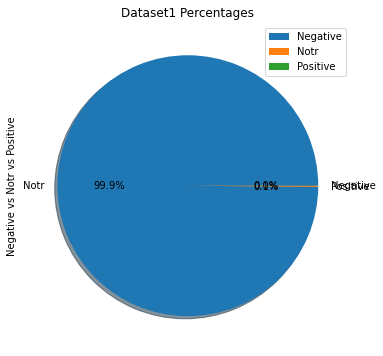

In [ ]:
label_df["label"].value_counts().plot(kind = 'pie', figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Negative vs Notr vs Positive")
plt.title("Dataset1 Percentages")
plt.legend(["Negative", "Notr", "Positive"])
plt.show()
# 100 000

In [ ]:
label_df.to_csv("labels.csv")

### Second

In [ ]:
label_df.value_counts()

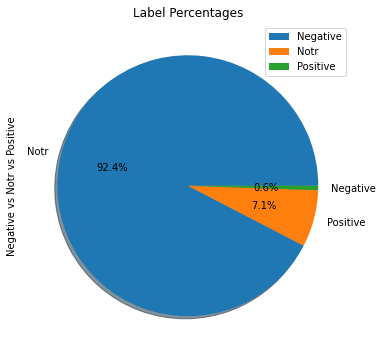

In [ ]:
label_df["label"].value_counts().plot(kind = 'pie', figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Negative vs Notr vs Positive")
plt.title("Label Percentages")
plt.legend(["Negative", "Notr", "Positive"])
plt.show()
# 10 000

### Third

In [ ]:
label_df.value_counts()

label   
Notr        337588
Positive      1917
Negative        63
dtype: int64

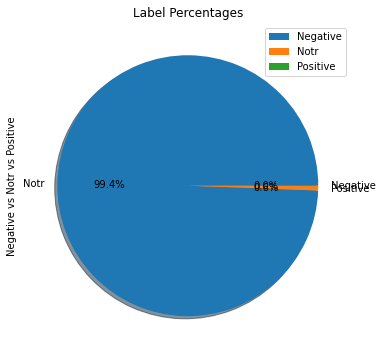

In [ ]:
label_df["label"].value_counts().plot(kind = 'pie', figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Negative vs Notr vs Positive")
plt.title("Label Percentages")
plt.legend(["Negative", "Notr", "Positive"])
plt.show()
#30 000

### Fourth

In [ ]:
label_df.value_counts()

label   
Notr        337588
Positive      1917
Negative        63
dtype: int64

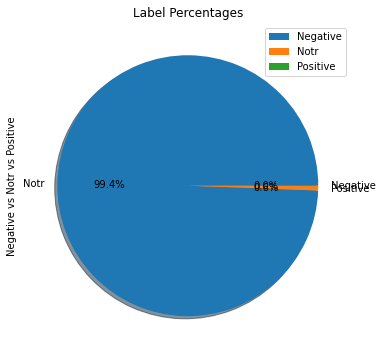

In [ ]:
label_df["label"].value_counts().plot(kind = 'pie', figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Negative vs Notr vs Positive")
plt.title("Label Percentages")
plt.legend(["Negative", "Notr", "Positive"])
plt.show()
# 20 000

### Fifth

In [ ]:
label_df.value_counts()

label   
Notr        330162
Positive      9114
Negative       292
dtype: int64

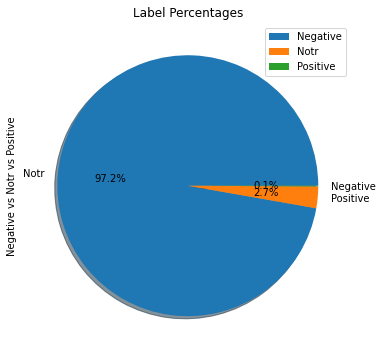

In [ ]:
label_df["label"].value_counts().plot(kind = 'pie', figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Negative vs Notr vs Positive")
plt.title("Label Percentages")
plt.legend(["Negative", "Notr", "Positive"])
plt.show()
# 15 000

### Sixth

In [ ]:
label_df.value_counts()

label   
Notr        324240
Positive     14697
Negative       631
dtype: int64

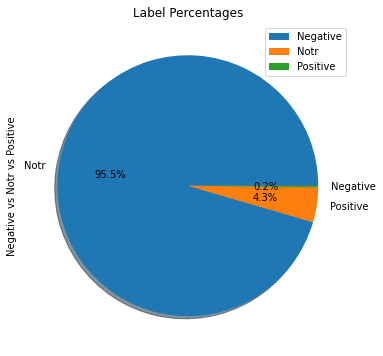

In [ ]:
label_df["label"].value_counts().plot(kind = 'pie', figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Negative vs Notr vs Positive")
plt.title("Label Percentages")
plt.legend(["Negative", "Notr", "Positive"])
plt.show()
## 11 000

### Seventh

In [ ]:
label_df.value_counts()

label   
Notr        313736
Positive     23962
Negative      1870
dtype: int64

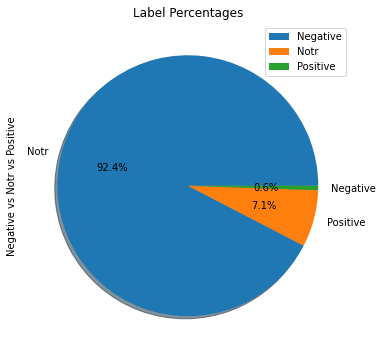

In [ ]:
label_df["label"].value_counts().plot(kind = 'pie', figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Negative vs Notr vs Positive")
plt.title("Label Percentages")
plt.legend(["Negative", "Notr", "Positive"])
plt.show()
## 10 000 with cross validation

# Birleştirilmiş

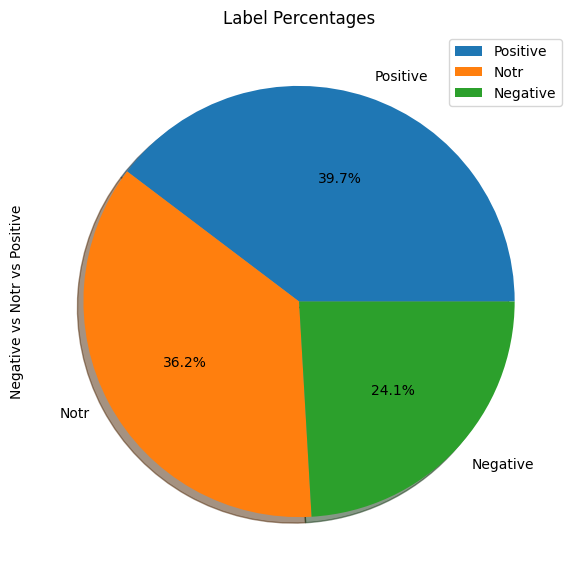

In [6]:
df_companies = pd.read_csv("process_twitter_data.csv")
df_companies["label"].value_counts().plot(kind = 'pie', figsize = (7,7), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Negative vs Notr vs Positive")
plt.title("Label Percentages")
plt.legend(["Positive", "Notr", "Negative"])
plt.show()